In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import configparser
import os
from pathlib import Path

import aps
import aps.ai.autoalignment.beamline28IDB.optimization.analysis_utils as analysis
import aps.ai.autoalignment.beamline28IDB.optimization.common as opt_common
import joblib
import matplotlib.pyplot as plt
import numpy as np
import optuna
import scipy
from IPython.display import Image, display_png

from epics import ca
ca.finalize_libca()

%matplotlib inline

28-ID - VKB Pitch Motor Resolution: 2e-05 deg


**** The executable "caRepeater" couldn't be located
**** because of errno = "No such file or directory".
**** You may need to modify your PATH environment variable.
**** Unable to start "CA Repeater" process.


In [3]:
exp_type = 'fwhm_lwsi'

In [10]:
#base_dir = Path(aps.__file__).parents[1]
autoalign_dir = Path("/Users/skandel/Library/CloudStorage/Box-Box/Beamtime_28ID_Nov2022/AI/autofocusing/")
data_base_dir = autoalign_dir / exp_type / 'denoised'
print(f'data base dir exists {data_base_dir.exists()}')


data base dir exists True


In [11]:
log_files = sorted(list(data_base_dir.glob('*.gz')))
hist_dirs = sorted(list(data_base_dir.glob('*steps')))
ini_files = sorted(list(data_base_dir.glob('*ini')))
image_dirs = sorted(list(data_base_dir.glob('*images')))
log_files, hist_dirs, ini_files

([PosixPath('/Users/skandel/Library/CloudStorage/Box-Box/Beamtime_28ID_Nov2022/AI/autofocusing/fwhm_lwsi/denoised/fwhm_lwsi_moo_optimization_final_150_2022-11-19_18:36.gz')],
 [PosixPath('/Users/skandel/Library/CloudStorage/Box-Box/Beamtime_28ID_Nov2022/AI/autofocusing/fwhm_lwsi/denoised/fwhm_lwsi_moo_150_2022-11-19_steps')],
 [PosixPath('/Users/skandel/Library/CloudStorage/Box-Box/Beamtime_28ID_Nov2022/AI/autofocusing/fwhm_lwsi/denoised/fwhm_lwsi_moo_autofocusing.ini')])

### fwhm_lwsi

In [13]:
print(image_dirs[0], hist_dirs[0])

/Users/skandel/Library/CloudStorage/Box-Box/Beamtime_28ID_Nov2022/AI/autofocusing/fwhm_lwsi/denoised/fwhm_lwsi_moo_150_2022-11-19_images /Users/skandel/Library/CloudStorage/Box-Box/Beamtime_28ID_Nov2022/AI/autofocusing/fwhm_lwsi/denoised/fwhm_lwsi_moo_150_2022-11-19_steps


Initial beam


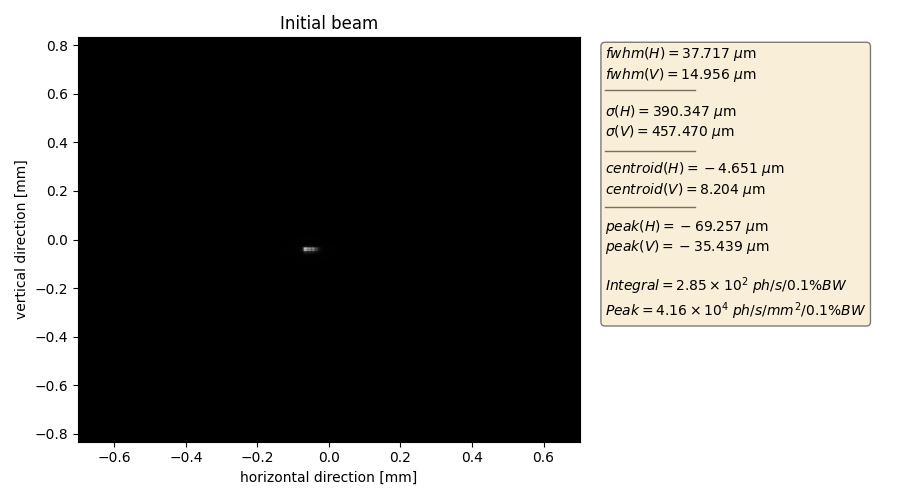

In [14]:
print("Initial beam")
reference = Image(filename= image_dirs[0] / 'Figure_1.png')
display_png(reference)

#### Experiment results

In [15]:
study = analysis.create_study_from_trials(log_files[0])

[I 2023-05-11 23:25:12,955] A new study created in memory with name: no-name-ecd6234c-1465-40e0-b96f-e090a5200f63


Assuming minimization for all objectives.


In [16]:
n_steps = len(study.trials)

In [17]:
hists = analysis.load_histograms_from_files(n_steps, hist_dirs[0], extension='gz')

In [18]:
nash_trial, nash_idx, n_doms = analysis.select_nash_equil_trial_from_pareto_front(study)

In [19]:
print(n_doms)
print(nash_trial.number, nash_trial.values)
print(nash_trial.user_attrs["dw"].__dict__)

[65, 124, 140, 132]
112 [0.010585718098234814, 16.28115613354708]
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.26446736633360063, 'h_fwhm': 0.007153311718388622, 'h_centroid': 0.01391919889143281, 'h_peak': 0.017232978230662322, 'v_sigma': 0.2638951371921114, 'v_fwhm': 0.007803048065651019, 'v_centroid': 0.025596550470151122, 'v_peak': 0.012029699101211292, 'integral_intensity': 35.44421862847553, 'peak_intensity': 64372.44, 'gaussian_fit': {}}}


Trial number 89
Trial values: peak_distance 2.094e-02 fwhm 1.625e+01
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.26155118246727455, 'h_fwhm': 0.01885873089393364, 'h_centroid': 0.011019976945040394, 'h_peak': 0.018533580361278303, 'v_sigma': 0.2635016385063346, 'v_fwhm': 0.009103556076592856, 'v_centroid': 0.003604260263320669, 'v_peak': 0.04779366940211012, 'integral_intensity': 34.85489941926752, 'peak_intensity': 64266.727, 'gaussian_fit': {}}}


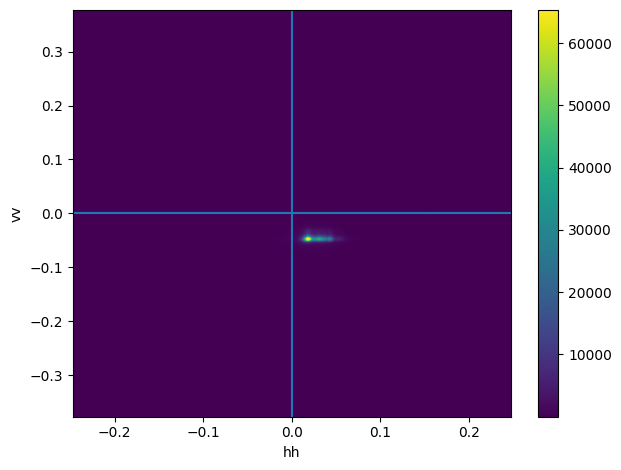

Trial number 100
Trial values: peak_distance 8.845e-03 fwhm 1.636e+01
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.2695094113474316, 'h_fwhm': 0.007153311718388622, 'h_centroid': 0.002091744794242026, 'h_peak': -0.005527559055118184, 'v_sigma': 0.26815243094905505, 'v_fwhm': 0.005202032043767346, 'v_centroid': 0.06179057065324835, 'v_peak': -0.05494646346229, 'integral_intensity': 36.43202500947245, 'peak_intensity': 64496.785, 'gaussian_fit': {}}}


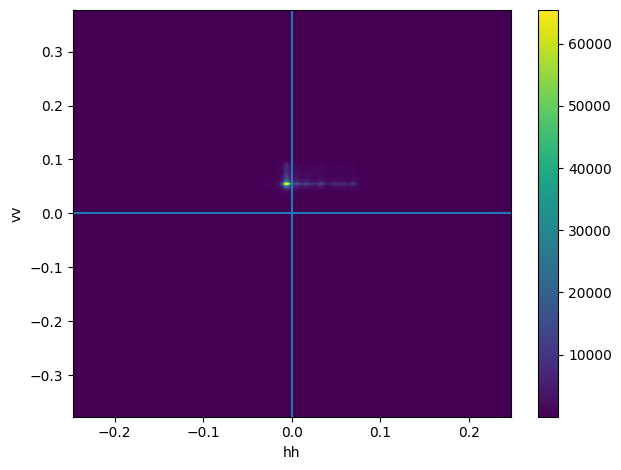

Trial number 112
Trial values: peak_distance 1.059e-02 fwhm 1.628e+01
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.26446736633360063, 'h_fwhm': 0.007153311718388622, 'h_centroid': 0.01391919889143281, 'h_peak': 0.017232978230662322, 'v_sigma': 0.2638951371921114, 'v_fwhm': 0.007803048065651019, 'v_centroid': 0.025596550470151122, 'v_peak': 0.012029699101211292, 'integral_intensity': 35.44421862847553, 'peak_intensity': 64372.44, 'gaussian_fit': {}}}


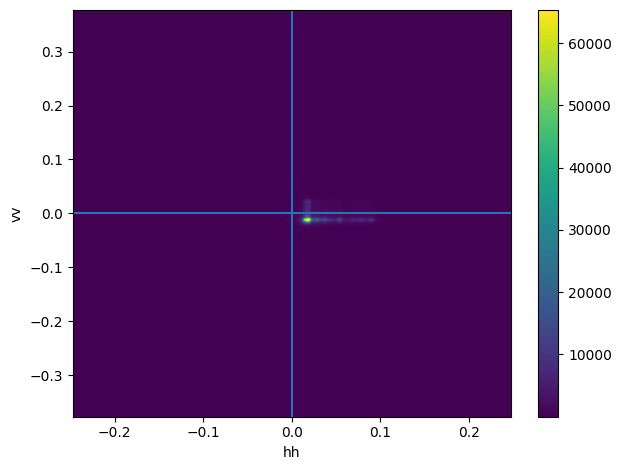

Trial number 116
Trial values: peak_distance 1.016e-02 fwhm 1.634e+01
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.2682868820582257, 'h_fwhm': 0.0078036127836966784, 'h_centroid': 0.011665737247813307, 'h_peak': 0.011380268642890178, 'v_sigma': 0.2693604396980465, 'v_fwhm': 0.006502540054709183, 'v_centroid': 0.04130490726083945, 'v_peak': -0.01658147713950765, 'integral_intensity': 35.97382649960259, 'peak_intensity': 64478.406, 'gaussian_fit': {}}}


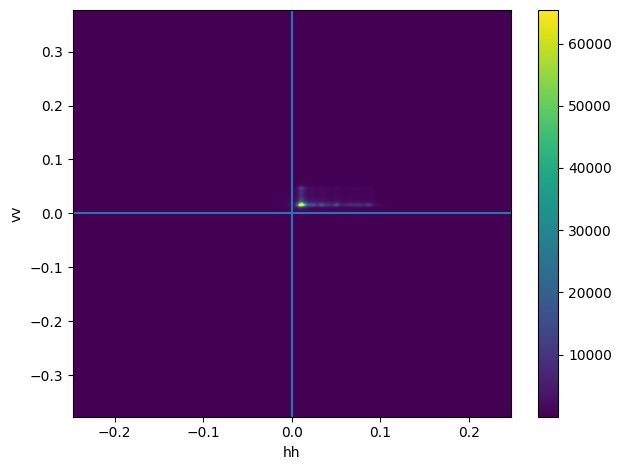

In [20]:
best_hists = []
for t in study.best_trials:
    print("Trial number", t.number)
    print(f"Trial values: peak_distance {t.values[0]:4.3e} fwhm {t.values[1]:4.3e}")
    print("Trial dw:")
    print(t.user_attrs["dw"].__dict__)
    hist = hists[t.number]
    plt.pcolormesh(hist.hh[700:-700], hist.vv[700:-700], hist.data_2D[700:-700,700:-700].T)
    plt.xlabel('hh')
    plt.ylabel('vv')
    plt.axhline(0)
    plt.axvline(0)
    plt.tight_layout()
    plt.colorbar()
    plt.show()

Result: Seems like the beam is too spread out in all the cases.

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_34460/1292482367.py:3: ExperimentalWarning: plot_pareto_front is experimental (supported from v2.8.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_pareto_front(study, target_names=["fwhm", "lwsi"],


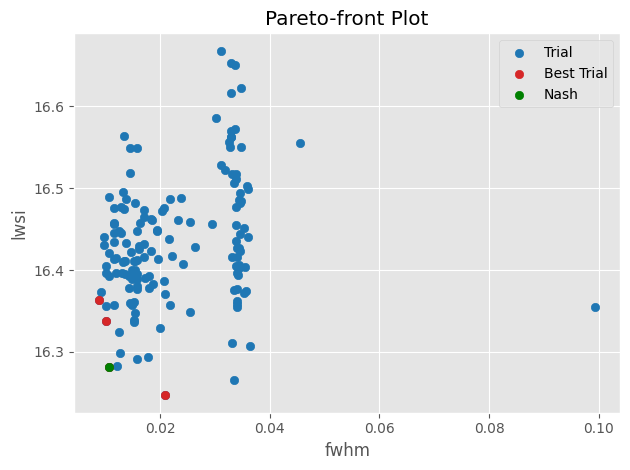

In [21]:
# Generating the pareto front for the multiobjective optimization

optuna.visualization.matplotlib.plot_pareto_front(study, target_names=["fwhm", "lwsi"], 
                                                  include_dominated_trials=True)
plt.scatter(*nash_trial.values, color='green', label='Nash')
#plt.ylim(-11.14, -10.9)
#plt.xlim(0, 0.005)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_34460/2275970600.py:2: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: t.values[0],


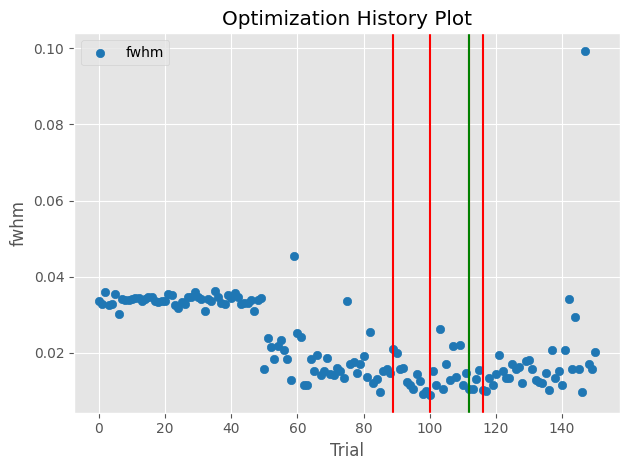

In [22]:
# Plotting the optimization histories
optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: t.values[0], 
                                                          target_name="fwhm")
for t in study.best_trials:
    plt.axvline(t.number, color='red')
plt.axvline(nash_trial.number, color='green')
plt.legend(loc="best")
plt.tight_layout()
plt.show()

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_34460/2457724956.py:2: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: t.values[1],


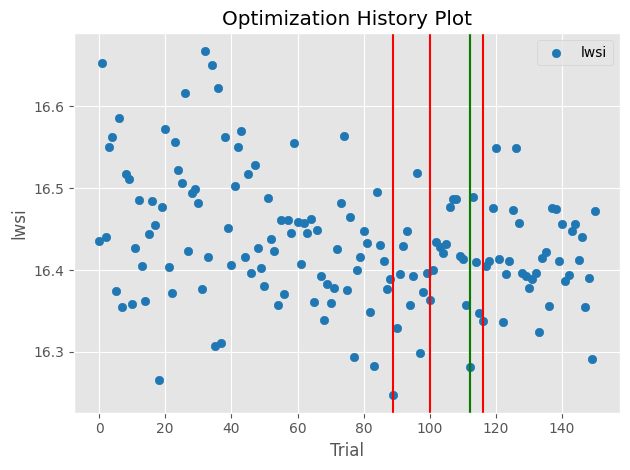

In [23]:
# Plotting the optimization histories
optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: t.values[1], 
                                                          target_name="lwsi")
for t in study.best_trials:
    plt.axvline(t.number, color='red')
plt.axvline(nash_trial.number, color='green')
plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [25]:
new_hists = []
new_dws = []
for h in hists:
    h1, dw = analysis.recalculate_info(h, noise_threshold=1.5, crop=500)
    new_hists.append(h1)
    new_dws.append(dw)

In [26]:
wsums = [opt_common._get_weighted_sum_intensity_from_hist(h1, 2) for h1 in new_hists]

In [27]:
wsums = np.array(wsums)

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_34460/436633895.py:2: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: np.log(wsums[t.number]),


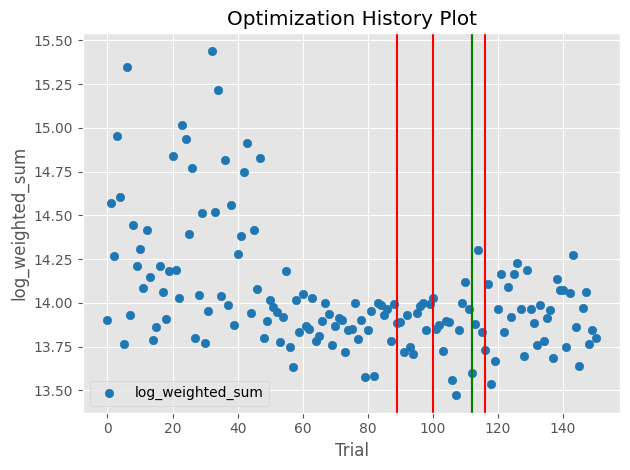

In [28]:
# Plotting the optimization histories
optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: np.log(wsums[t.number]),
                                                          target_name="log_weighted_sum")
for t in study.best_trials:
    plt.axvline(t.number, color='red')
plt.axvline(nash_trial.number, color='green')
plt.legend(loc="best")
plt.tight_layout()
plt.show()

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_34460/4268674650.py:3: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: sigmas[t.number],


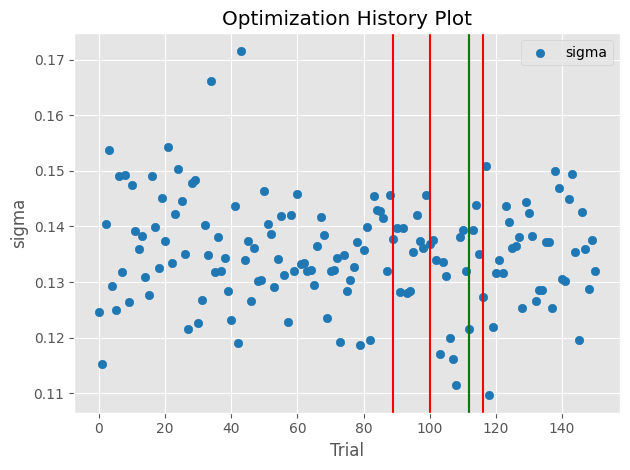

In [29]:
# Plotting the optimization histories
sigmas = [opt_common._get_sigma_from_dw(dw) for dw in new_dws]
optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: sigmas[t.number],
                                                          target_name="sigma")
for t in study.best_trials:
    plt.axvline(t.number, color='red')
plt.axvline(nash_trial.number, color='green')
plt.legend(loc="best")
plt.tight_layout()
plt.show()

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_34460/3370862287.py:3: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: fwhms[t.number],


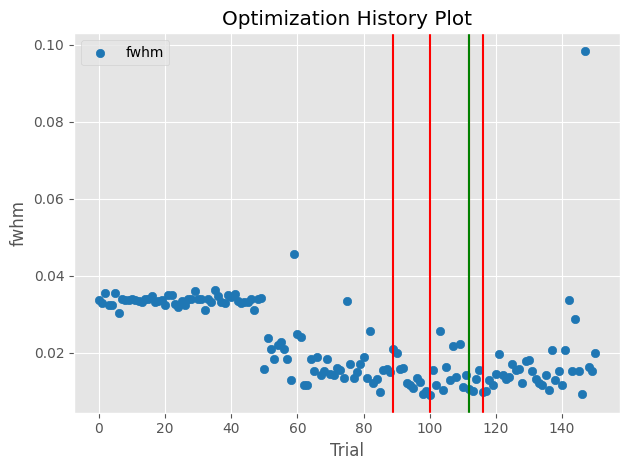

In [30]:
# Plotting the optimization histories
fwhms = [opt_common._get_fwhm_from_dw(dw) for dw in new_dws]
optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: fwhms[t.number],
                                                          target_name="fwhm")
for t in study.best_trials:
    plt.axvline(t.number, color='red')
plt.axvline(nash_trial.number, color='green')
plt.legend(loc="best")
plt.tight_layout()
plt.show()

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_34460/3952178995.py:3: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: kl_divs[t.number],


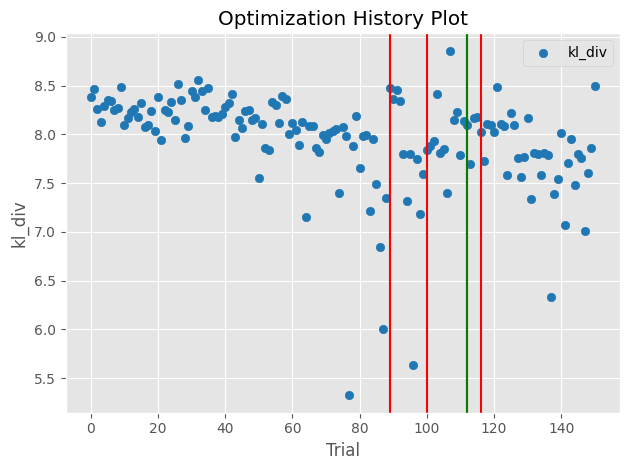

In [31]:
# Plotting the optimization histories
kl_divs  = [opt_common._get_kl_divergence_with_gaussian_from_hist(hist, ref_fwhm=(5e-3,5e-3)) for hist in new_hists]
optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: kl_divs[t.number],
                                                          target_name="kl_div")
for t in study.best_trials:
    plt.axvline(t.number, color='red')
plt.axvline(nash_trial.number, color='green')
plt.legend(loc="best")
plt.tight_layout()
plt.show()

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_34460/330897592.py:3: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: plocs[t.number],


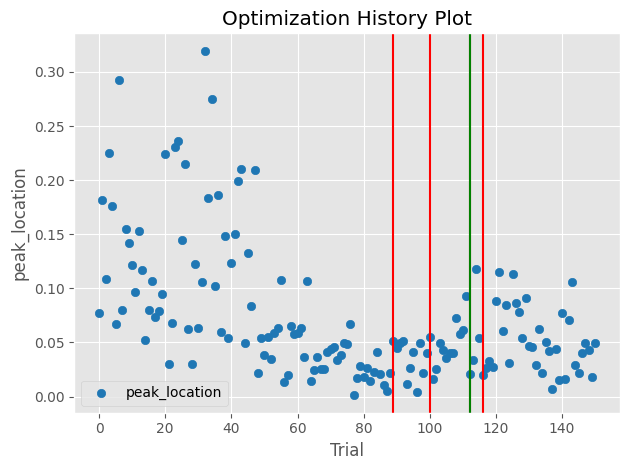

In [32]:
# Plotting the optimization histories
plocs = [opt_common._get_peak_distance_from_dw(dw) for dw in new_dws]
optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: plocs[t.number],
                                                          target_name="peak_location")
for t in study.best_trials:
    plt.axvline(t.number, color='red')
plt.axvline(nash_trial.number, color='green')
plt.legend(loc="best")
plt.tight_layout()
plt.show()

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_34460/3201353947.py:3: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: pints[t.number],


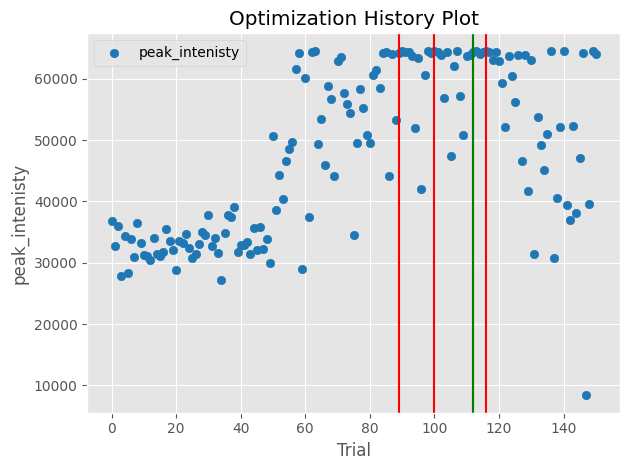

In [33]:
# Plotting the optimization histories
pints = [opt_common._get_peak_intensity_from_dw(dw) for dw in new_dws]
optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: pints[t.number],
                                                          target_name="peak_intenisty")
for t in study.best_trials:
    plt.axvline(t.number, color='red')
plt.axvline(nash_trial.number, color='green')
plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [34]:
np.argmin(kl_divs)

77

In [44]:
# FWHM, WSUM

test_val_fns = [lambda t: opt_common._get_fwhm_from_dw(new_dws[t.number]),
                lambda t: np.log(wsums[t.number])]
test_values = []
for t in study.trials:
    test_values.append([vf(t) for vf in test_val_fns])


test_pareto = analysis.get_pareto_front_trials(study.trials, [1,1], values_fns=test_val_fns)
domins = analysis.calculate_dominated_trials(study.trials, study.trials, [1,1], test_val_fns)
print(np.argmax(domins), len(test_pareto))

112 6


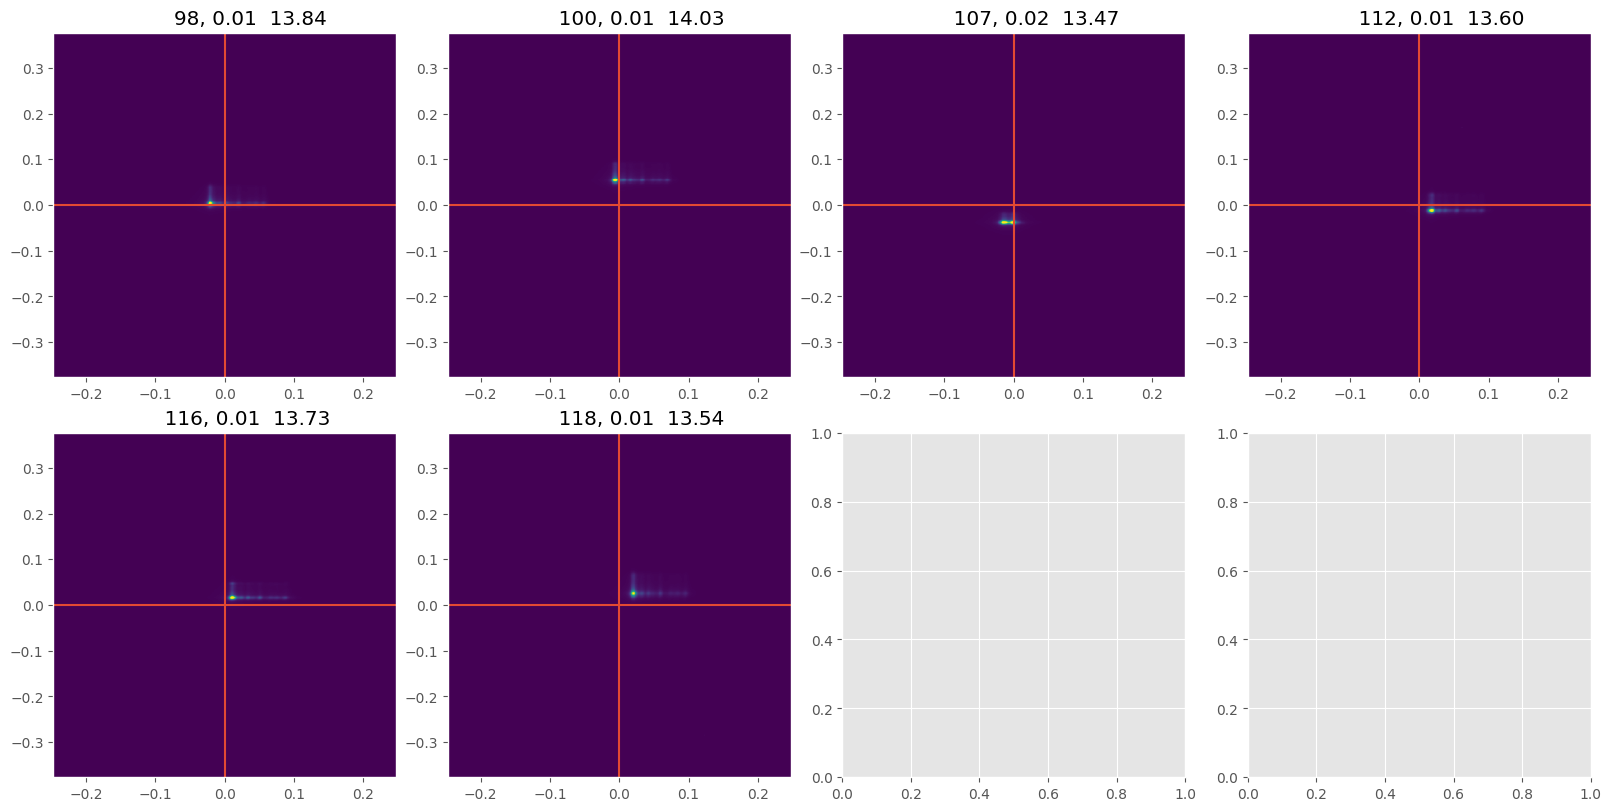

In [47]:
n_rows = np.ceil(len(test_pareto) / 4).astype('int')

fig, axs = plt.subplots(n_rows, 4, figsize=[16, n_rows * 4], constrained_layout=True)
axs = axs.ravel()

for i, t in enumerate(test_pareto):
    

    hdata = hists[t.number]
    
    cax = axs[i].pcolormesh(hdata.hh[700:-700], hdata.vv[700:-700][:,None], hdata.data_2D[700:-700,700:-700].T)#, norm=mpl.colors.LogNorm())
    axs[i].axvline(0)
    axs[i].axhline(0)
    
    val_strs = "  ".join([f"{tval:3.2f}" for tval in test_values[t.number]])
    axs[i].set_title(f"{t.number:>10}, {val_strs}")
    #plt.colorbar(cax, ax=axs[i])
plt.show()

In [48]:
# FWHM, KL

test_val_fns = [lambda t: opt_common._get_fwhm_from_dw(new_dws[t.number]),
                lambda t: kl_divs[t.number]]
test_values = []
for t in study.trials:
    test_values.append([vf(t) for vf in test_val_fns])


test_pareto = analysis.get_pareto_front_trials(study.trials, [1,1], values_fns=test_val_fns)
domins = analysis.calculate_dominated_trials(study.trials, study.trials, [1,1], test_val_fns)
print(np.argmax(domins), len(test_pareto))

98 3


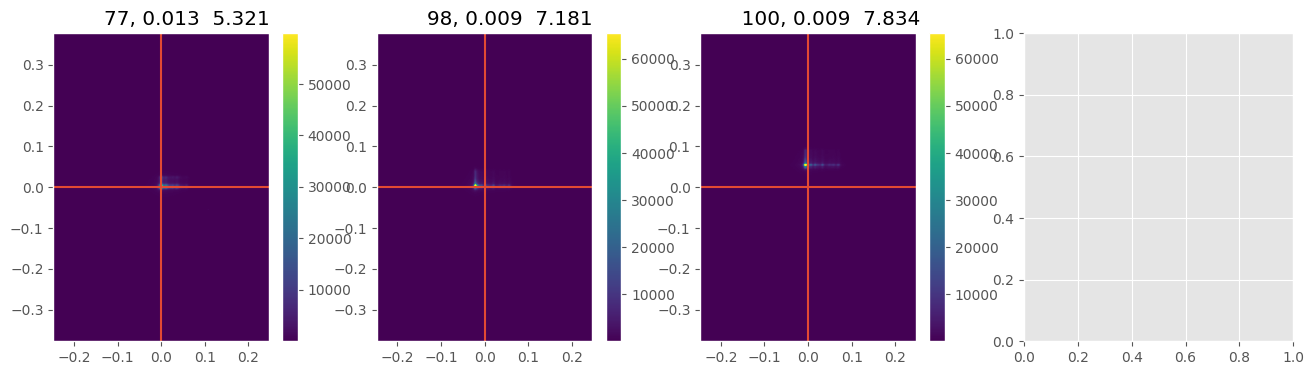

In [49]:
n_rows = np.ceil(len(test_pareto) / 4).astype('int')

fig, axs = plt.subplots(n_rows, 4, figsize=[16, n_rows * 4])
axs = axs.ravel()

for i, t in enumerate(test_pareto):
    

    hdata = hists[t.number]
    
    cax = axs[i].pcolormesh(hdata.hh[700:-700], hdata.vv[700:-700][:,None], hdata.data_2D[700:-700,700:-700].T)#, norm=mpl.colors.LogNorm())
    axs[i].axvline(0)
    axs[i].axhline(0)
    
    val_strs = "  ".join([f"{tval:4.3f}" for tval in test_values[t.number]])
    axs[i].set_title(f"{t.number:>10}, {val_strs}")
    plt.colorbar(cax, ax=axs[i])
plt.show()

In [50]:
# centroid, KL

test_val_fns = [lambda t: opt_common._get_centroid_distance_from_dw(new_dws[t.number]),
                lambda t: kl_divs[t.number]]
test_values = []
for t in study.trials:
    test_values.append([vf(t) for vf in test_val_fns])


test_pareto = analysis.get_pareto_front_trials(study.trials, [1,1], values_fns=test_val_fns)
domins = analysis.calculate_dominated_trials(study.trials, study.trials, [1,1], test_val_fns)
print(np.argmax(domins), len(test_pareto))

141 3


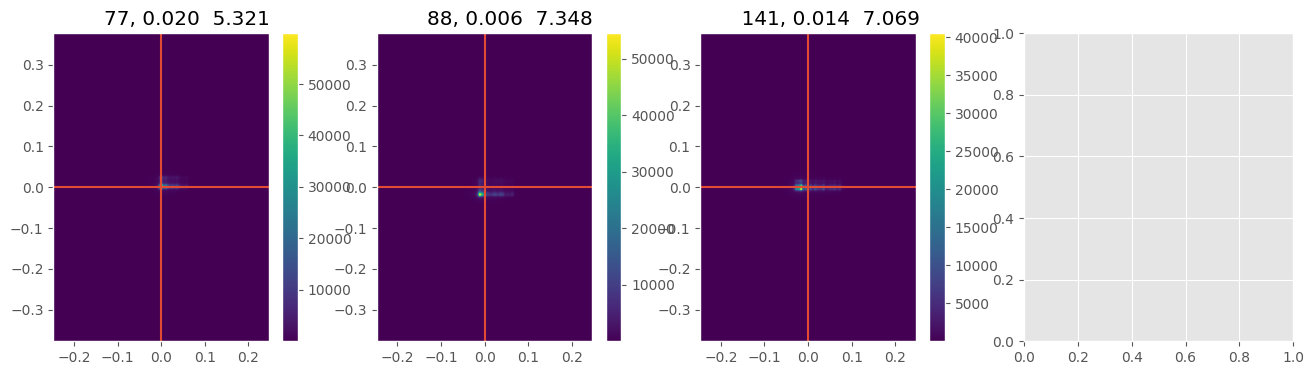

In [51]:
n_rows = np.ceil(len(test_pareto) / 4).astype('int')

fig, axs = plt.subplots(n_rows, 4, figsize=[16, n_rows * 4])
axs = axs.ravel()

for i, t in enumerate(test_pareto):
    

    hdata = hists[t.number]
    
    cax = axs[i].pcolormesh(hdata.hh[700:-700], hdata.vv[700:-700][:,None], hdata.data_2D[700:-700,700:-700].T)#, norm=mpl.colors.LogNorm())
    axs[i].axvline(0)
    axs[i].axhline(0)
    
    val_strs = "  ".join([f"{tval:4.3f}" for tval in test_values[t.number]])
    axs[i].set_title(f"{t.number:>10}, {val_strs}")
    plt.colorbar(cax, ax=axs[i])
plt.show()

In [52]:
# peak_location, KL

test_val_fns = [lambda t: opt_common._get_peak_distance_from_dw(new_dws[t.number]),
                lambda t: kl_divs[t.number]]
test_values = []
for t in study.trials:
    test_values.append([vf(t) for vf in test_val_fns])


test_pareto = analysis.get_pareto_front_trials(study.trials, [1,1], values_fns=test_val_fns)
domins = analysis.calculate_dominated_trials(study.trials, study.trials, [1,1], test_val_fns)
print(np.argmax(domins), len(test_pareto))

77 1


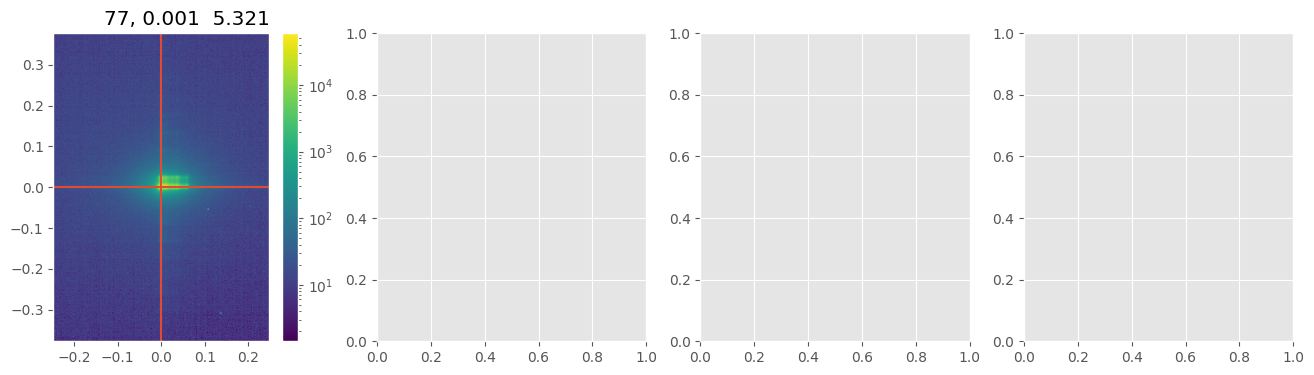

In [53]:
n_rows = np.ceil(len(test_pareto) / 4).astype('int')

fig, axs = plt.subplots(n_rows, 4, figsize=[16, n_rows * 4])
axs = axs.ravel()

for i, t in enumerate(test_pareto):
    

    hdata = hists[t.number]
    
    cax = axs[i].pcolormesh(hdata.hh[700:-700], hdata.vv[700:-700][:,None], hdata.data_2D[700:-700,700:-700].T, norm=mpl.colors.LogNorm())
    axs[i].axvline(0)
    axs[i].axhline(0)
    
    val_strs = "  ".join([f"{tval:4.3f}" for tval in test_values[t.number]])
    axs[i].set_title(f"{t.number:>10}, {val_strs}")
    plt.colorbar(cax, ax=axs[i])
plt.show()

In [54]:
# peak_intensity, KL

test_val_fns = [lambda t: -np.log(opt_common._get_peak_intensity_from_dw(new_dws[t.number])), 
                lambda t: kl_divs[t.number]]
test_values = []
for t in study.trials:
    test_values.append([vf(t) for vf in test_val_fns])


test_pareto = analysis.get_pareto_front_trials(study.trials, [1, 1], values_fns=test_val_fns)
domins = analysis.calculate_dominated_trials(study.trials, study.trials, [1,1], test_val_fns)
print(np.argmax(domins), len(test_pareto))

98 5


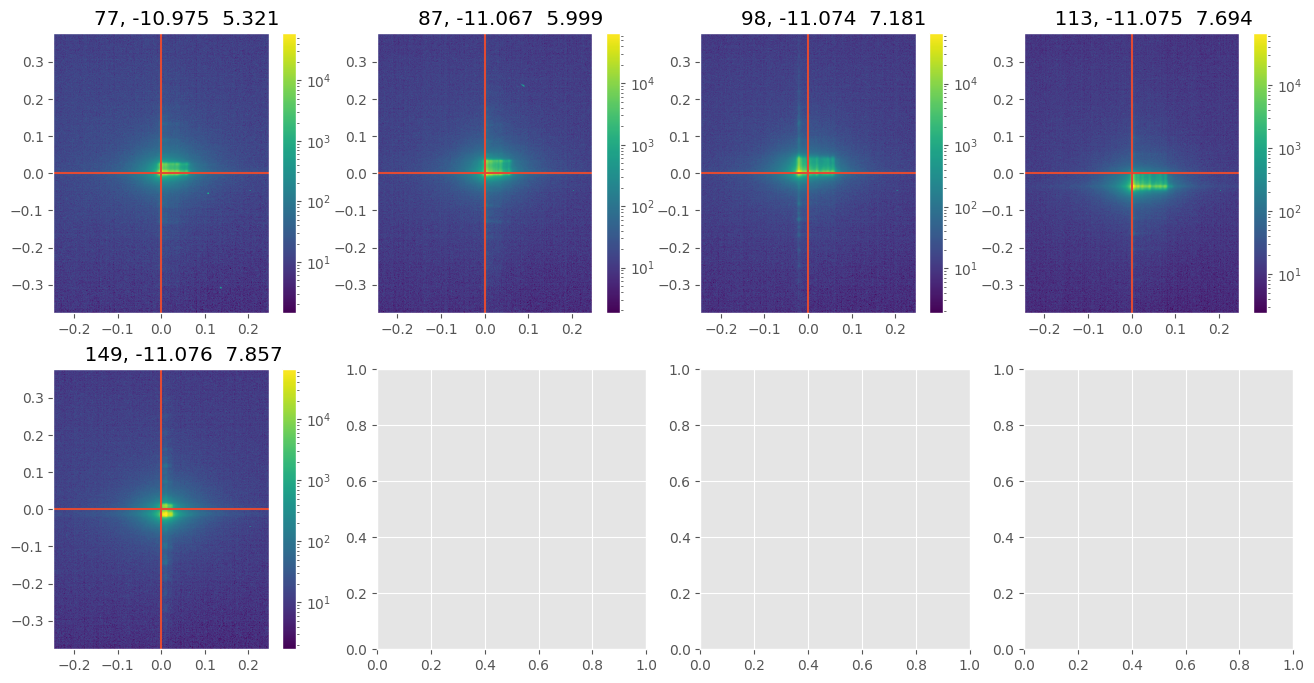

In [55]:
n_rows = np.ceil(len(test_pareto) / 4).astype('int')

fig, axs = plt.subplots(n_rows, 4, figsize=[16, n_rows * 4])
axs = axs.ravel()

for i, t in enumerate(test_pareto):
    

    hdata = hists[t.number]
    
    cax = axs[i].pcolormesh(hdata.hh[700:-700], hdata.vv[700:-700][:,None], hdata.data_2D[700:-700,700:-700].T, norm=mpl.colors.LogNorm())
    axs[i].axvline(0)
    axs[i].axhline(0)
    
    val_strs = "  ".join([f"{tval:4.3f}" for tval in test_values[t.number]])
    axs[i].set_title(f"{t.number:>10}, {val_strs}")
    plt.colorbar(cax, ax=axs[i])
plt.show()

In [56]:
# peak_intensity, peak_location, KL

test_val_fns = [lambda t: -np.log(opt_common._get_peak_intensity_from_dw(new_dws[t.number])), lambda t: opt_common._get_peak_distance_from_dw(new_dws[t.number]),
                lambda t: kl_divs[t.number]]
test_values = []
for t in study.trials:
    test_values.append([vf(t) for vf in test_val_fns])


test_pareto = analysis.get_pareto_front_trials(study.trials, [1,1, 1], values_fns=test_val_fns)
domins = analysis.calculate_dominated_trials(study.trials, study.trials, [1,1,1], test_val_fns)
print(np.argmax(domins), len(test_pareto))

87 7


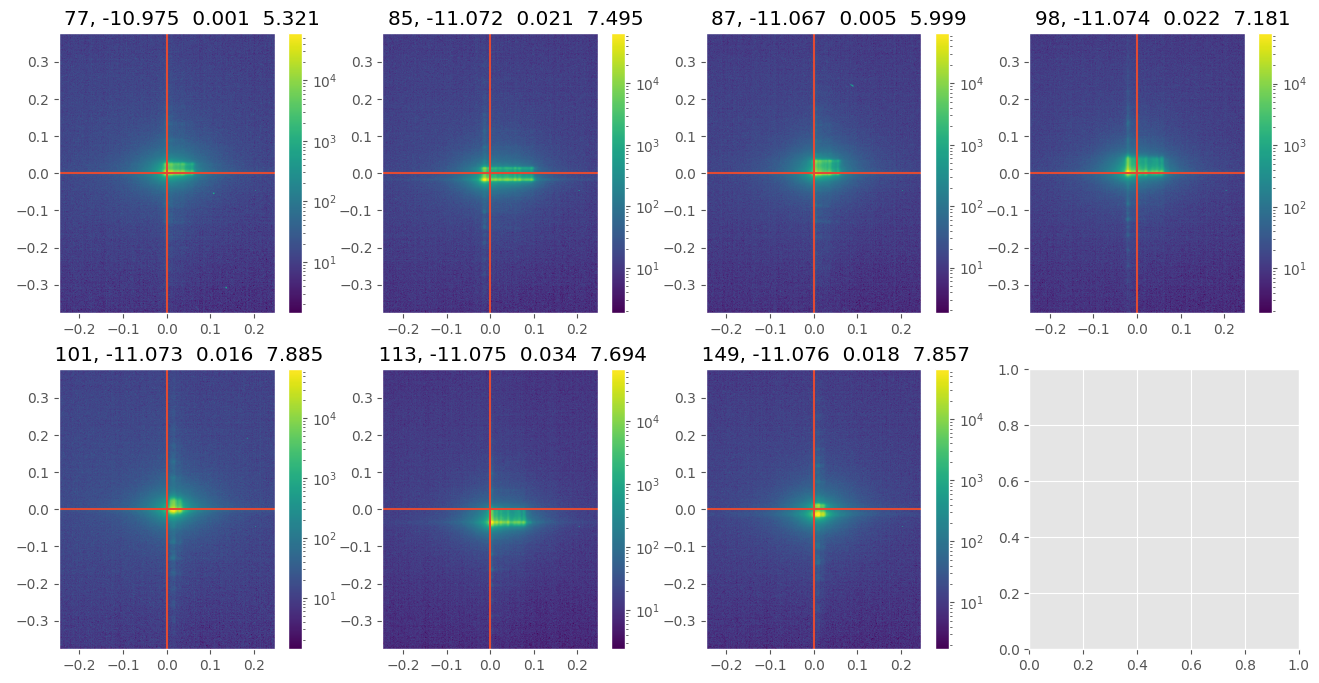

In [57]:
n_rows = np.ceil(len(test_pareto) / 4).astype('int')

fig, axs = plt.subplots(n_rows, 4, figsize=[16, n_rows * 4])
axs = axs.ravel()

for i, t in enumerate(test_pareto):
    

    hdata = hists[t.number]
    
    cax = axs[i].pcolormesh(hdata.hh[700:-700], hdata.vv[700:-700][:,None], hdata.data_2D[700:-700,700:-700].T, norm=mpl.colors.LogNorm())
    axs[i].axvline(0)
    axs[i].axhline(0)
    
    val_strs = "  ".join([f"{tval:4.3f}" for tval in test_values[t.number]])
    axs[i].set_title(f"{t.number:>10}, {val_strs}")
    plt.colorbar(cax, ax=axs[i])
plt.show()